In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cyclus_input_gen.demand_deploy as dd
import parser

In [2]:
eq = parser.expr('1+x').compile()


# demand_deploy Example

This Jupyter notebook shows an example of using the demand_deploy module in the package.
demand_deploy generated deployment arrays given:
* Existing capacity
* demand equation

The user can choose to cut off deployment after a certain timestep, or to start deployment only after a certain timestep.

## Example 1.
We start from an empty simulation with timestep 500, and apply a power demand of:
`y = (1+0.01)^(t/12)`

In [3]:
prev_power_dict = {'instA': np.zeros(500)}

We make a cutoff at timestep 300, where before it we only deploy LWRs of capacity 1000MWe (1GWe) and lifetime 720 timesteps, and after we deploy SFRs of capacity 600MWe (0.6GWe) with lifetime 840 timesteps, to meet the power demand

['instA']
instA
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

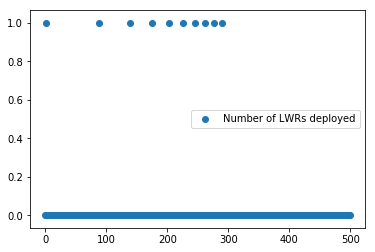

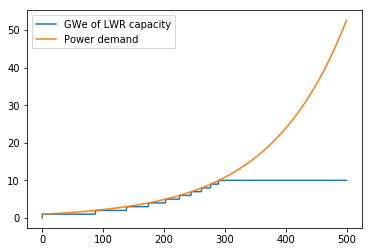

In [4]:
# first, the lwr deployment
lwr_deploy_array, lwr_deploy_power = dd.get_new_deployment(power_dict=prev_power_dict,
                                                           inst_list=['instA'],
                                                           demand_eq='(1 + 0.1)**(t/12)',
                                                           new_reactor_power=1,
                                                           new_reactor_lifetime=720,
                                                           avail_timestep=300,
                                                           new=False)

time = np.arange(0, 500)

plt.scatter(time, lwr_deploy_array, label='Number of LWRs deployed')
plt.legend()
plt.show()

plt.plot(lwr_deploy_power, label='GWe of LWR capacity')
power_demand = (1+0.1)**(time/12)
plt.plot(power_demand, label='Power demand')
plt.legend()
plt.show()

In [5]:
# you have to add the deployed LWR power
prev_power_dict['lwr'] = lwr_deploy_power

{'instA': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 

['instA', 'lwr']
instA
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 

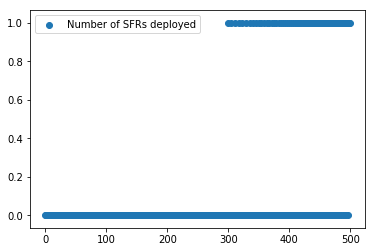

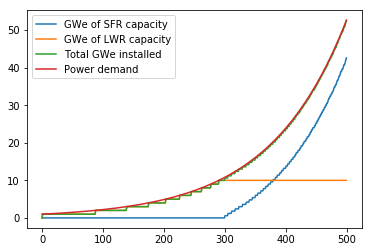

In [7]:
# then, the sfr deployment
# first, the lwr deployment
sfr_deploy_array, sfr_deploy_power = dd.get_new_deployment(power_dict=prev_power_dict,
                                                           inst_list=['instA', 'lwr'],
                                                           demand_eq='(1 + 0.1)**(t/12)',
                                                           new_reactor_power=0.6,
                                                           new_reactor_lifetime=840,
                                                           avail_timestep=300,
                                                           new=True)

time = np.arange(0, 500)

plt.scatter(time, sfr_deploy_array, label='Number of SFRs deployed')
plt.legend()
plt.show()

plt.plot(sfr_deploy_power, label='GWe of SFR capacity')
plt.plot(lwr_deploy_power, label='GWe of LWR capacity')
plt.plot(sfr_deploy_power + lwr_deploy_power, label='Total GWe installed')
power_demand = (1+0.1)**(time/12)
plt.plot(power_demand, label='Power demand')
plt.legend()
plt.show()

In [10]:
# you can also create a DeployInst xml block with these deploy arrays:
dd.write_deployinst(deploy_array=sfr_deploy_array,
                    reactor_name='sfr',
                    filename='sfr_deploy.xml',
                    lifetime=840)
! cat sfr_deploy.xml

<root>
<prototypes>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr</val>
		<val>sfr<